<a href="https://colab.research.google.com/github/SRBSaurabh/Fruit_image_classification_CNN/blob/main/Fruit_Classififcation_Using_CNN_srb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fruit Classification Using CNN**
## **Create a CNN model using 2-, 3- and 4-layers which is having the batch-size of 32.** 
## *Perform the following considering each case:-*
### a. Show the computations for the parameters in each case 
### b. List the model accuracy for training and testing data along with the actual & predicted classes
### c. Write the conclusion as which model gives the best performance

### Importing Libraries

In [ ]:
# For Reading Images:
import cv2
import os

# For Numerical Computations:
import numpy as np
import pandas as pd

# For Visualization:
import matplotlib.pyplot as plt
import seaborn as sns

# For Neural Network Model:
import tensorflow as tf
# from keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import MaxPool2D

from sklearn.metrics import confusion_matrix

# For Mounting the Dataset with Colab Notebook
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Image Preprocessing...**
## *& Creating required Train & Test Data*

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_dir = "/content/drive/MyDrive/D/Saurabh/Fruits2/Train"
test_dir = "/content/drive/MyDrive/D/Saurabh/Fruits2/Test"

train_datagen = ImageDataGenerator(rescale = 1./255,              # to Rescaling the image in range of [0,1]
                                   shear_range = 0.2,             # to randomly Shear the images 
                                   zoom_range = 0.2,              # to randomly Zoom the images
                                   horizontal_flip = True)        # for randomly flipping half of the images horizontally 

test_datagen = ImageDataGenerator(rescale = 1./255)

print("\n Processing the Fruits-Image DataSet...\n")
training_set = train_datagen.flow_from_directory(directory=train_dir,
                                                 color_mode='rgb',
                                                 target_size=(128,128),
                                                 batch_size=32,                #Total no. of batches
                                                 class_mode='categorical')

test_set = test_datagen.flow_from_directory(directory=test_dir,
                                            color_mode='rgb', shuffle=False,
                                            target_size=(128,128),
                                            batch_size=32,
                                            class_mode='categorical')


 Processing the Fruits-Image DataSet...

Found 20 images belonging to 5 classes.
Found 5 images belonging to 5 classes.


# ***A)*** Creating a **CNN** model with **2-Hidden Layers**:

In [ ]:
## Building CNN
classifier_2CL = Sequential([
                      ## Step 1)   Adding 1st-Hidden Convolution layer & Pooling layer
                      Conv2D(filters=32, kernel_size=(3,3), strides=(1, 1), activation='relu', input_shape=(128,128,3)),
                      MaxPool2D((2,2)),
#                                 Adding 2nd-Hidden Convolution layer
                      Conv2D(filters=32, kernel_size=(3,3), strides=(1, 1), activation='relu', padding='same'),

                      ## Step 2)   Flattening the layer's output
                      Flatten(),

                      ## Step 3)   Full_Connection Dense Layer & Output Layer
                      Dense(64, activation='relu'),
                      Dense(5, activation='softmax'),
                ])

## Step 4)   Compiling CNN-model
classifier_2CL.compile( loss="categorical_crossentropy",  optimizer="adam",  metrics=["accuracy"] )

## Step 5)   Fitting CNN to images with Batch-Size of 32
hist = classifier_2CL.fit(   training_set, epochs = 7, validation_data = test_set  )

Epoch 1/7
1/1 [==============================] - 3s 3s/step - loss: 1.6281 - accuracy: 0.2000 - val_loss: 18.9566 - val_accuracy: 0.2000
Epoch 2/7
1/1 [==============================] - 1s 1s/step - loss: 19.8302 - accuracy: 0.2000 - val_loss: 9.0735 - val_accuracy: 0.2000
Epoch 3/7
1/1 [==============================] - 1s 1s/step - loss: 8.9157 - accuracy: 0.2000 - val_loss: 8.6704 - val_accuracy: 0.4000
Epoch 4/7
1/1 [==============================] - 1s 1s/step - loss: 8.0541 - accuracy: 0.2500 - val_loss: 7.1031 - val_accuracy: 0.2000
Epoch 5/7
1/1 [==============================] - 2s 2s/step - loss: 6.6799 - accuracy: 0.2000 - val_loss: 1.7133 - val_accuracy: 0.4000
Epoch 6/7
1/1 [==============================] - 1s 668ms/step - loss: 1.6111 - accuracy: 0.4000 - val_loss: 1.2491 - val_accuracy: 0.4000
Epoch 7/7
1/1 [==============================] - 1s 641ms/step - loss: 1.4513 - accuracy: 0.3000 - val_loss: 1.2738 - val_accuracy: 0.4000


## **Summary of Parameters of 2-Layer CNN model:**

In [ ]:
classifier_2CL.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 63, 63, 32)        9248      
                                                                 
 flatten (Flatten)           (None, 127008)            0         
                                                                 
 dense (Dense)               (None, 64)                8128576   
                                                                 
 dense_1 (Dense)             (None, 5)                 325       
                                                        

## 2-Layered CNN-Model Accuracy on Training & Testing Data:

In [ ]:
print('Train Accuracy : ', round(100*hist.history['accuracy'][-1], 4) , '%')
print('Test Accuracy : ', round(100*hist.history['val_accuracy'][-1], 4) , '%')

Train Accuracy :  30.0 %
Test Accuracy :  40.0 %


## Doing Predictions & Compair it with True Labels

In [ ]:
y_pred=np.argmax(classifier_2CL.predict(test_set), axis=1)
y_true= np.array([0, 1, 2, 3, 4])
print('y_pred :\n ',y_pred)
print('y_true :\n', y_true)

y_pred :
  [0 1 1 2 2]
y_true :
 [0 1 2 3 4]


## Visualizing the **Actual** V/s **Predicted** Labels :

Actual_Label= Strawberry 	==>> Predicted_Lable= Grapes


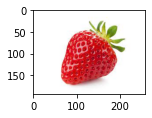

Actual_Label= Pear 	==>> Predicted_Lable= Grapes


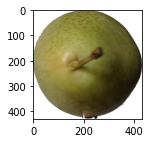

Actual_Label= Grapes 	==>> Predicted_Lable= Banana


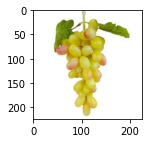

Actual_Label= Banana 	==>> Predicted_Lable= Banana


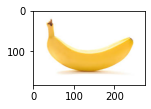

Actual_Label= Apple 	==>> Predicted_Lable= Apple


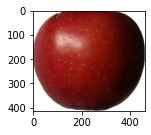

In [ ]:
x,y = test_set.next()
for i, filename in enumerate(os.listdir(test_dir)):
  plt.figure(figsize=(2, 2))
  
  Actual_Label = os.path.dirname(test_set.filenames[len(y_true)-1-i])              # only OK if shuffle=false
  Predicted_Lable = os.path.dirname(test_set.filenames[y_pred[len(y_true)-1-i]])
  print("Actual_Label=",Actual_Label, '\t==>>', "Predicted_Lable=",Predicted_Lable)
  pics = os.listdir(rf"{test_dir}/{filename}")[0]
  img = cv2.imread(rf"{test_dir}/{filename}/{pics}")
  image_x = x[i,:,:,0]
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  # plt.imshow(image_x)
  plt.show()

## Ploting Confusion Matrix:

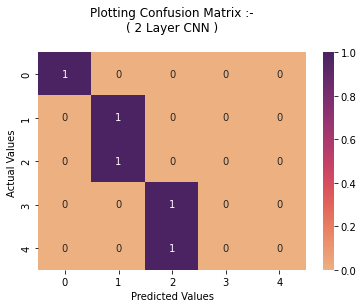

In [ ]:
def Plot_Confusion_Matrix(y_true, y_pred, model):
  conf_matrix = (confusion_matrix(y_true, y_pred, labels=[0, 1, 2, 3, 4]))
  # Using Seaborn heatmap to create the plot
  fig = sns.heatmap(conf_matrix, annot=True, cmap='flare')
  # Give the title and x, y axis of plot
  fig.set_title(f'Plotting Confusion Matrix :-\n({model})\n');
  fig.set_xlabel('Predicted Values')
  fig.set_ylabel('Actual Values ');
  plt.show()

Plot_Confusion_Matrix(y_true, y_pred, model=" 2 Layer CNN ")

# ***B)*** Creating a **CNN** model with **3-Hidden Convolution Layers**:

In [ ]:
## Building CNN
classifier_3CL = Sequential([
                      ## Step 1)   Adding 1st-Hidden Convolution layer
                      Conv2D(filters=32, kernel_size=(3,3), strides=(1, 1), activation='relu', input_shape=(128,128,3)),
#                                 Adding 2nd-Hidden Convolution layer & Pooling layer
                      Conv2D(filters=32, kernel_size=(3,3), strides=(1, 1), activation='relu', padding='same'),
                      MaxPool2D((2,2)),
#                                 Adding 3rd-Hidden Convolution layer
                      Conv2D(filters=32, kernel_size=(3,3), strides=(1, 1), activation='relu'),

                      ## Step 2)   Flattening the layer's output
                      Flatten(),

                      ## Step 3)   Full_Connection Dense Layer & Output Layer
                      Dense(64, activation='relu'),
                      Dense(5, activation='softmax'),
                ])

## Step 4)   Compiling CNN-model
classifier_3CL.compile( loss="categorical_crossentropy",  optimizer="adam",  metrics=["accuracy"] )

## Step 5)   Fitting CNN to images with Batch-Size of 32
hist = classifier_3CL.fit(   training_set, epochs = 15, validation_data = test_set  )

Epoch 1/15
1/1 [==============================] - 2s 2s/step - loss: 1.6135 - accuracy: 0.2000 - val_loss: 9.8881 - val_accuracy: 0.2000
Epoch 2/15
1/1 [==============================] - 1s 1s/step - loss: 10.4814 - accuracy: 0.2000 - val_loss: 6.4968 - val_accuracy: 0.2000
Epoch 3/15
1/1 [==============================] - 1s 1s/step - loss: 6.8554 - accuracy: 0.2000 - val_loss: 3.0327 - val_accuracy: 0.4000
Epoch 4/15
1/1 [==============================] - 1s 1s/step - loss: 3.0421 - accuracy: 0.2500 - val_loss: 2.7075 - val_accuracy: 0.2000
Epoch 5/15
1/1 [==============================] - 1s 1s/step - loss: 2.6347 - accuracy: 0.2000 - val_loss: 2.0260 - val_accuracy: 0.6000
Epoch 6/15
1/1 [==============================] - 1s 1s/step - loss: 1.9811 - accuracy: 0.5500 - val_loss: 1.5178 - val_accuracy: 0.6000
Epoch 7/15
1/1 [==============================] - 1s 1s/step - loss: 1.5299 - accuracy: 0.6000 - val_loss: 1.3289 - val_accuracy: 0.4000
Epoch 8/15
1/1 [========================

## **Summary of Parameters of 3-Layer CNN model:**

In [ ]:
classifier_3CL.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 flatten_1 (Flatten)         (None, 119072)            0         
                                                                 
 dense_2 (Dense)             (None, 64)                7620672   
                                                      

## 3-Layered CNN-Model Accuracy on Training & Testing Data:

In [ ]:
print('Train Accuracy : ', round(100*hist.history['accuracy'][-1], 4) , '%')
print('Test Accuracy : ', round(100*hist.history['val_accuracy'][-1], 4) , '%')

Train Accuracy :  80.0 %
Test Accuracy :  80.0 %


## Doing Predictions & Compair it with True Labels

In [ ]:
y_pred=np.argmax(classifier_3CL.predict(test_set), axis=1)
y_true= np.array([0, 1, 2, 3, 4])
print('y_pred :\n ',y_pred)
print('y_true :\n', y_true)

y_pred :
  [0 2 2 3 4]
y_true :
 [0 1 2 3 4]


## Visualizing the **Actual** V/s **Predicted** Labels :

Actual_Label= Strawberry 	==>> Predicted_Lable= Strawberry


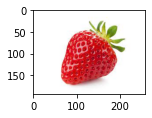

Actual_Label= Pear 	==>> Predicted_Lable= Pear


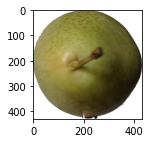

Actual_Label= Grapes 	==>> Predicted_Lable= Grapes


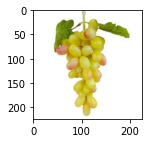

Actual_Label= Banana 	==>> Predicted_Lable= Grapes


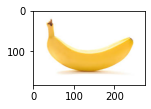

Actual_Label= Apple 	==>> Predicted_Lable= Apple


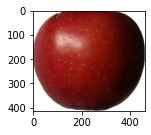

In [ ]:
x,y = test_set.next()
for i, filename in enumerate(os.listdir(test_dir)):
  plt.figure(figsize=(2, 2))
  
  Actual_Label = os.path.dirname(test_set.filenames[len(y_true)-1-i])              # only OK if shuffle=false
  Predicted_Lable = os.path.dirname(test_set.filenames[y_pred[len(y_true)-1-i]])
  print("Actual_Label=",Actual_Label, '\t==>>', "Predicted_Lable=",Predicted_Lable)
  pics = os.listdir(rf"{test_dir}/{filename}")[0]
  img = cv2.imread(rf"{test_dir}/{filename}/{pics}")
  image_x = x[i,:,:,0]
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.show()

## Confusion Matrix:

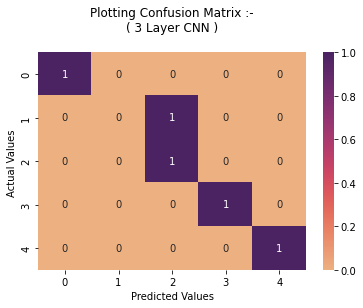

In [ ]:
Plot_Confusion_Matrix(y_true, y_pred, model=" 3 Layer CNN ")

# ***C)*** Creating a **CNN** model with **4-Hidden Convolution Layers**:

In [ ]:
## Building CNN
classifier_4CL = Sequential([
                      ## Step 1)   Adding 1st-Hidden Convolution layer
                      Conv2D(filters=32, kernel_size=(3,3), strides=(1, 1), activation='relu', input_shape=(128,128,3)),
#                                 Adding 2nd-Hidden Convolution layer and Pooling layer
                      Conv2D(filters=32, kernel_size=(3,3), strides=(1, 1), activation='relu', padding='same'),
                      MaxPool2D((2,2)),
#                                 Adding 3rd-Hidden Convolution layer
                      Conv2D(filters=64, kernel_size=(3,3), strides=(2, 2), activation='relu'),
#                                 Adding 4rd-Hidden Convolution layer
                      Conv2D(filters=32, kernel_size=(3,3), strides=(2, 2), activation='relu'),

                      ## Step 2)   Flattening the layer's output
                      Flatten(),

                      ## Step 3)   Full_Connection Dense Layer & Output Layer
                      Dense(64, activation='relu'),
                      Dense(5, activation='softmax'),
                ])

## Step 4)   Compiling CNN-model
classifier_4CL.compile( loss="categorical_crossentropy",  optimizer="adam",  metrics=["accuracy"] )

## Step 5)   Fitting CNN to images with Batch-Size of 32
hist = classifier_4CL.fit(   training_set, epochs = 25, validation_data = test_set  )

Epoch 1/25
1/1 [==============================] - 2s 2s/step - loss: 1.6068 - accuracy: 0.2000 - val_loss: 1.5060 - val_accuracy: 0.2000
Epoch 2/25
1/1 [==============================] - 1s 1s/step - loss: 1.5544 - accuracy: 0.2000 - val_loss: 1.4485 - val_accuracy: 0.4000
Epoch 3/25
1/1 [==============================] - 1s 1s/step - loss: 1.4787 - accuracy: 0.2000 - val_loss: 1.3143 - val_accuracy: 0.6000
Epoch 4/25
1/1 [==============================] - 1s 1s/step - loss: 1.3235 - accuracy: 0.7000 - val_loss: 1.0855 - val_accuracy: 0.8000
Epoch 5/25
1/1 [==============================] - 1s 1s/step - loss: 1.1652 - accuracy: 0.7500 - val_loss: 0.8853 - val_accuracy: 0.6000
Epoch 6/25
1/1 [==============================] - 1s 1s/step - loss: 0.9309 - accuracy: 0.8000 - val_loss: 1.1386 - val_accuracy: 0.4000
Epoch 7/25
1/1 [==============================] - 1s 1s/step - loss: 1.0885 - accuracy: 0.5000 - val_loss: 1.0132 - val_accuracy: 0.6000
Epoch 8/25
1/1 [=========================

## **Summary of Parameters of 4-Layer CNN model:**

In [ ]:
classifier_4CL.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 conv2d_6 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 31, 31, 64)        18496     
                                                                 
 conv2d_8 (Conv2D)           (None, 15, 15, 32)        18464     
                                                                 
 flatten_2 (Flatten)         (None, 7200)              0         
                                                      

## 4-Layered CNN-Model Accuracy on Training & Testing Data:

In [ ]:
print('Train Accuracy : ', round(100*hist.history['accuracy'][-1], 4) , '%')
print('Test Accuracy : ', round(100*hist.history['val_accuracy'][-1], 4) , '%')

Train Accuracy :  100.0 %
Test Accuracy :  100.0 %


## Doing Predictions & Compair it with True Labels

In [ ]:
y_pred=np.argmax(classifier_4CL.predict(test_set), axis=1)
y_true= np.array([0, 1, 2, 3, 4])
print('y_pred :\n ',y_pred)
print('y_true :\n', y_true)

y_pred :
  [0 1 2 3 4]
y_true :
 [0 1 2 3 4]


## Visualizing the **Actual** V/s **Predicted** Labels :

Actual_Label= Strawberry 	==>> Predicted_Lable= Strawberry


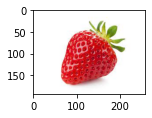

Actual_Label= Pear 	==>> Predicted_Lable= Pear


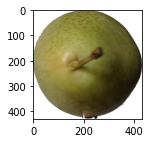

Actual_Label= Grapes 	==>> Predicted_Lable= Grapes


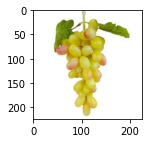

Actual_Label= Banana 	==>> Predicted_Lable= Banana


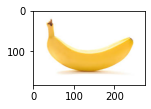

Actual_Label= Apple 	==>> Predicted_Lable= Apple


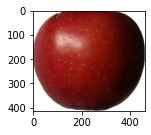

In [ ]:
x,y = test_set.next()
for i, filename in enumerate(os.listdir(test_dir)):
  plt.figure(figsize=(2, 2))
  
  Actual_Label = os.path.dirname(test_set.filenames[len(y_true)-1-i])              # only OK if shuffle=false
  Predicted_Lable = os.path.dirname(test_set.filenames[y_pred[len(y_true)-1-i]])
  print("Actual_Label=",Actual_Label, '\t==>>', "Predicted_Lable=",Predicted_Lable)
  pics = os.listdir(rf"{test_dir}/{filename}")[0]
  img = cv2.imread(rf"{test_dir}/{filename}/{pics}")
  image_x = x[i,:,:,0]
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.show()

## Ploting Confusion Matrix :

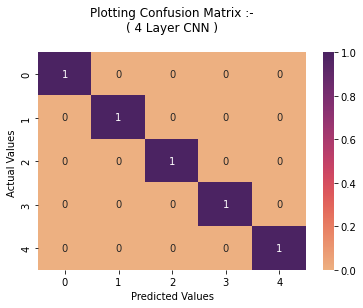

In [ ]:
Plot_Confusion_Matrix(y_true, y_pred, model=" 4 Layer CNN ")

# **Conclusion**:
## After Compairing all the Training & Testing Accuracies of all the above 3 models,
## The model having ***4-Hidden Convolution Layers*** is giving us the *Best Predictions for our Fruit images*.